In [1]:
import sys
sys.path.append('..')
import os
os.environ["BRASA_DATA_PATH"] = "D:\\brasa"

import brasa

In [2]:
man = brasa.engine.CacheManager()
con = man.db_connection

In [3]:
con.view("b3-cotahist").columns

['regtype',
 'refdate',
 'bdi_code',
 'symbol',
 'instrument_market',
 'corporation_name',
 'specification_code',
 'days_to_settlement',
 'trading_currency',
 'open',
 'high',
 'low',
 'average',
 'close',
 'best_bid',
 'best_ask',
 'trade_quantity',
 'traded_contracts',
 'volume',
 'strike_price',
 'strike_price_adjustment_indicator',
 'maturity_date',
 'allocation_lot_size',
 'strike_price_in_points',
 'isin',
 'distribution_id']

In [4]:
con.sql("select * from 'b3-cotahist' where instrument_market = 10 and isin[7:9] in ('UNT', 'CDA', 'ACN')")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

┌─────────┬─────────────────────┬──────────┬─────────┬───┬──────────────────────┬──────────────┬─────────────────┐
│ regtype │       refdate       │ bdi_code │ symbol  │ … │ strike_price_in_po…  │     isin     │ distribution_id │
│ varchar │      timestamp      │  int64   │ varchar │   │        double        │   varchar    │      int64      │
├─────────┼─────────────────────┼──────────┼─────────┼───┼──────────────────────┼──────────────┼─────────────────┤
│ 01      │ 2022-02-01 00:00:00 │        2 │ LAND3   │ … │                  0.0 │ BRLANDACNOR9 │             100 │
│ 01      │ 2022-03-08 00:00:00 │        2 │ PDGR3   │ … │                  0.0 │ BRPDGRACNOR8 │             115 │
│ 01      │ 2022-02-01 00:00:00 │        2 │ BLAU3   │ … │                  0.0 │ BRBLAUACNOR8 │             103 │
│ 01      │ 2022-02-17 00:00:00 │        2 │ SEER3   │ … │                  0.0 │ BRSEERACNOR5 │             119 │
│ 01      │ 2022-03-08 00:00:00 │        2 │ RSID3   │ … │                  0.0 

In [5]:
con.sql("select distinct symbol, corporation_name from 'b3-cotahist' where instrument_market = 10 and isin[7:9] = 'CTF' and bdi_code = 14 and specification_code[:2] = 'CI'")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

┌─────────┬──────────────────┐
│ symbol  │ corporation_name │
│ varchar │     varchar      │
├─────────┼──────────────────┤
│ REVE11  │ IT NOW GREEN     │
│ VIGT11  │ FIP VINCI IE     │
│ URET11  │ TREND U REIT     │
│ SHOT11  │ IT NOW SHOT      │
│ ESGE11  │ TREND ESG E      │
│ GOVE11  │ IT NOW IGCT      │
│ SMAB11  │ BTG SMLL CAP     │
│ SMAL11  │ ISHARES SMAL     │
│ SMAC11  │ IT NOW SMALL     │
│ SPXI11  │ IT NOW SPXI      │
│   ·     │      ·           │
│   ·     │      ·           │
│   ·     │      ·           │
│ BKOI11  │ FIP BKO BREI     │
│ BRHY11  │ BRAD FIM HY      │
│ TPLT11  │ FIA BTAM FVL     │
│ BBFI11B │ FII BB PROGR     │
│ SINE11  │ FIA FATOR S2     │
│ PUMA11  │ FDO DYN PUMA     │
│ SINC11  │ FIA FATOR V      │
│ AEFI11  │ FII AESAPAR      │
│ BRCP11  │ FIP BRASCAN      │
│ GPTC11B │ FIQ GP TECNO     │
├─────────┴──────────────────┤
│    150 rows (20 shown)     │
└────────────────────────────┘

In [6]:
res = con.sql("select refdate, symbol, close, distribution_id from 'b3-cotahist' where symbol = 'BOVA11' order by refdate")
res

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

┌─────────────────────┬─────────┬────────┬─────────────────┐
│       refdate       │ symbol  │ close  │ distribution_id │
│      timestamp      │ varchar │ double │      int64      │
├─────────────────────┼─────────┼────────┼─────────────────┤
│ 2008-12-02 00:00:00 │ BOVA11  │  35.39 │             100 │
│ 2008-12-03 00:00:00 │ BOVA11  │  35.31 │             100 │
│ 2008-12-04 00:00:00 │ BOVA11  │   35.7 │             100 │
│ 2008-12-05 00:00:00 │ BOVA11  │  35.35 │             100 │
│ 2008-12-08 00:00:00 │ BOVA11  │  38.46 │             100 │
│ 2008-12-09 00:00:00 │ BOVA11  │  37.54 │             100 │
│ 2008-12-10 00:00:00 │ BOVA11  │  39.03 │             100 │
│ 2008-12-11 00:00:00 │ BOVA11  │  38.89 │             100 │
│ 2008-12-12 00:00:00 │ BOVA11  │  39.11 │             100 │
│ 2008-12-15 00:00:00 │ BOVA11  │  38.57 │             100 │
│          ·          │   ·     │    ·   │              ·  │
│          ·          │   ·     │    ·   │              ·  │
│          ·          │ 

In [6]:
res = con.sql("""
with cal as (
    select refdate
    from calendar
    where isbizday_B3 = true and refdate < today()
), ch as (
    select refdate, symbol, close, distribution_id
    from 'b3-cotahist'
    where symbol = 'IVVB11'
)
select * from (
    select cal.refdate, ch.symbol, ch.close, ch.distribution_id
    from cal
    left join ch on cal.refdate = ch.refdate
    where cal.refdate between (select min(refdate) from ch) and (select max(refdate) from ch)
)
order by refdate
""")
res

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

┌────────────┬─────────┬────────┬─────────────────┐
│  refdate   │ symbol  │ close  │ distribution_id │
│    date    │ varchar │ double │      int64      │
├────────────┼─────────┼────────┼─────────────────┤
│ 2014-04-29 │ IVVB11  │  41.96 │             100 │
│ 2014-04-30 │ IVVB11  │   42.3 │             100 │
│ 2014-05-02 │ IVVB11  │  42.11 │             100 │
│ 2014-05-05 │ IVVB11  │  41.92 │             100 │
│ 2014-05-06 │ IVVB11  │  41.98 │             100 │
│ 2014-05-07 │ IVVB11  │  41.97 │             100 │
│ 2014-05-08 │ IVVB11  │  41.74 │             100 │
│ 2014-05-09 │ IVVB11  │   42.0 │             100 │
│ 2014-05-12 │ IVVB11  │  42.39 │             100 │
│ 2014-05-13 │ IVVB11  │  42.31 │             100 │
│     ·      │   ·     │    ·   │              ·  │
│     ·      │   ·     │    ·   │              ·  │
│     ·      │   ·     │    ·   │              ·  │
│ 2023-05-22 │ IVVB11  │  230.3 │             100 │
│ 2023-05-23 │ IVVB11  │  227.8 │             100 │
│ 2023-05-24

In [7]:
df = res.to_df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [9]:
df[df.symbol.isna()]

,refdate,symbol,close,distribution_id
35,2014-06-20,NaN,NaN,NaN
47,2014-07-08,NaN,NaN,NaN
58,2014-07-24,NaN,NaN,NaN
77,2014-08-20,NaN,NaN,NaN
128,2014-10-30,NaN,NaN,NaN
132,2014-11-05,NaN,NaN,NaN


<AxesSubplot: xlabel='refdate', ylabel='close'>

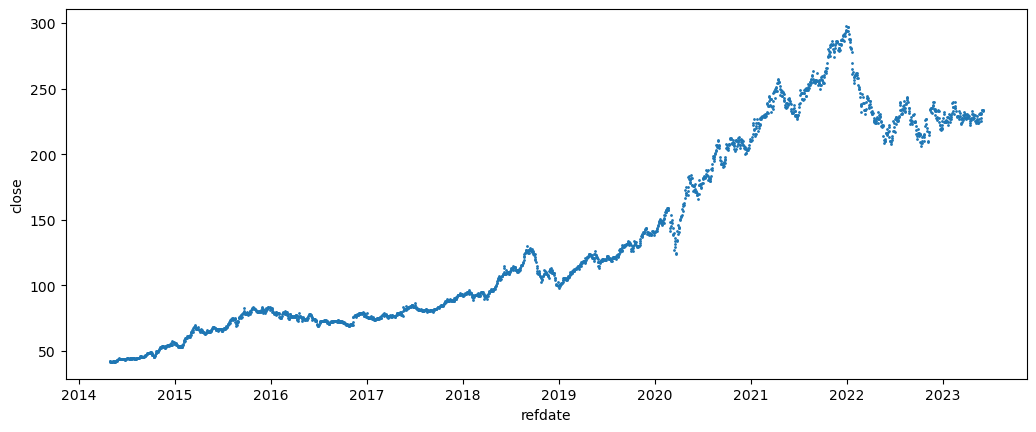

In [8]:
df.plot(x="refdate", y="close", kind="scatter", s=1)

In [10]:
res = con.sql("select distinct refdate, symbol, close, distribution_id from 'b3-cotahist' where symbol in ('BOVA11', 'PIBB11', 'SMAL11', 'DIVO11') order by refdate")
res

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

┌─────────────────────┬─────────┬────────┬─────────────────┐
│       refdate       │ symbol  │ close  │ distribution_id │
│      timestamp      │ varchar │ double │      int64      │
├─────────────────────┼─────────┼────────┼─────────────────┤
│ 2004-07-26 00:00:00 │ PIBB11  │   26.4 │             100 │
│ 2004-07-27 00:00:00 │ PIBB11  │  26.93 │             100 │
│ 2004-07-28 00:00:00 │ PIBB11  │  27.45 │             100 │
│ 2004-07-29 00:00:00 │ PIBB11  │  27.59 │             100 │
│ 2004-07-30 00:00:00 │ PIBB11  │   27.7 │             100 │
│ 2004-08-02 00:00:00 │ PIBB11  │  27.75 │             100 │
│ 2004-08-03 00:00:00 │ PIBB11  │  27.75 │             100 │
│ 2004-08-04 00:00:00 │ PIBB11  │  27.65 │             100 │
│ 2004-08-05 00:00:00 │ PIBB11  │   26.9 │             100 │
│ 2004-08-06 00:00:00 │ PIBB11  │   26.6 │             100 │
│          ·          │   ·     │     ·  │              ·  │
│          ·          │   ·     │     ·  │              ·  │
│          ·          │ 

In [11]:
df = res.to_df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

<AxesSubplot: xlabel='refdate'>

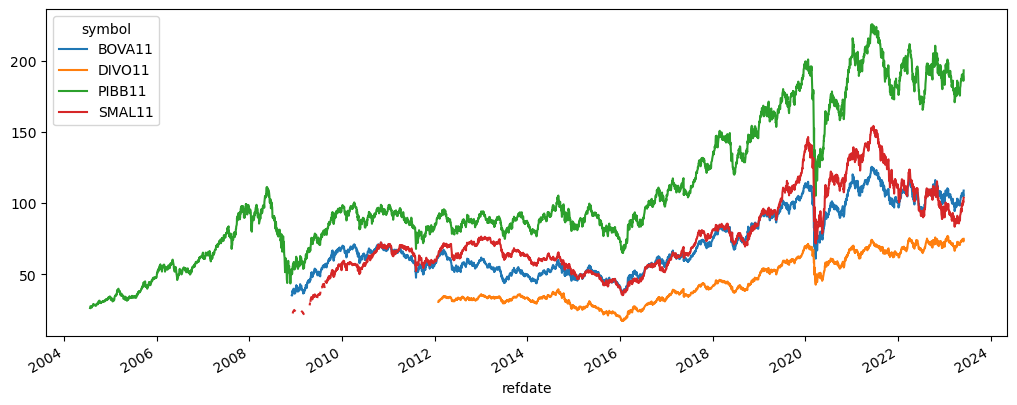

In [12]:
df.pivot(index="refdate", columns="symbol", values="close").plot()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

0

<AxesSubplot: xlabel='refdate'>

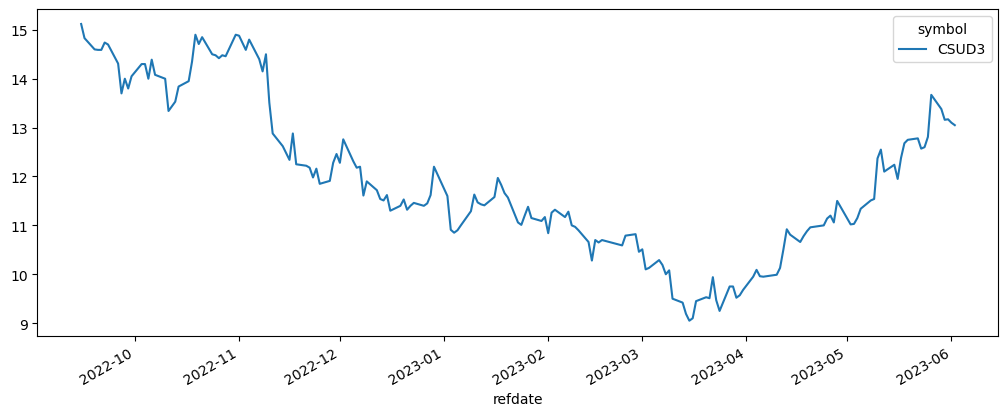

In [22]:
res = con.sql("""
with cal as (
    select refdate
    from calendar
    where isbizday_B3 = true and refdate < today()
), ch as (
    select refdate, symbol, close, distribution_id
    from 'b3-cotahist'
    where symbol = 'CSUD3'
)
select * from (
    select cal.refdate, ch.symbol, ch.close, ch.distribution_id
    from cal
    left join ch on cal.refdate = ch.refdate
    where cal.refdate between (select min(refdate) from ch) and (select max(refdate) from ch)
)
order by refdate
""")
df = res.fetchdf()
display(df.close.isna().sum())
df.pivot(index="refdate", columns="symbol", values="close").plot()

In [15]:
df = con.sql("""
select strftime(refdate, '%Y') as year, count(*) cnt from 'b3-cotahist'
where instrument_market in (70, 80)
group by year
order by year
""").to_df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

<AxesSubplot: xlabel='year'>

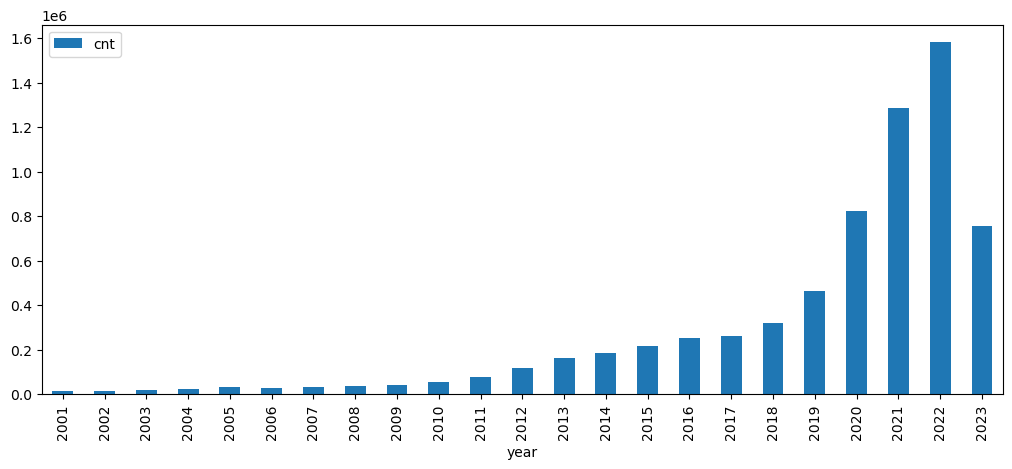

In [16]:
df.plot(x="year", y="cnt", kind="bar")

In [17]:
df = con.sql("""
select symbol, count(*) cnt from 'b3-cotahist'
where
    instrument_market = 30
    and refdate = '2023-06-01'
group by symbol
order by cnt
""").to_df()
df

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,symbol,cnt
0,ABCB4T,1
1,ABEV3T,1
2,AESB3T,1
3,AGRO3T,1
4,ALUP11T,1
...,...,...
154,MGLU3T,6
155,PETR4T,6
156,PRIO3T,6
157,VIIA3T,6


In [18]:
df = con.sql("""
    select refdate, symbol, avg(close) as close from 'b3-cotahist'
    where symbol = 'VALE3T'
    group by refdate, symbol
    union all
    select refdate, symbol, close from 'b3-cotahist'
    where
        symbol = 'VALE3'
    order by refdate
""").to_df()
df

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,refdate,symbol,close
0,2001-01-02,VALE3,43.200000
1,2001-01-03,VALE3,46.000000
2,2001-01-04,VALE3,44.500000
3,2001-01-04,VALE3T,46.580000
4,2001-01-05,VALE3,44.000000
...,...,...,...
8915,2023-05-31,VALE3,63.810000
8916,2023-06-01,VALE3T,67.352857
8917,2023-06-01,VALE3,65.160000
8918,2023-06-02,VALE3T,69.916250


<AxesSubplot: xlabel='refdate'>

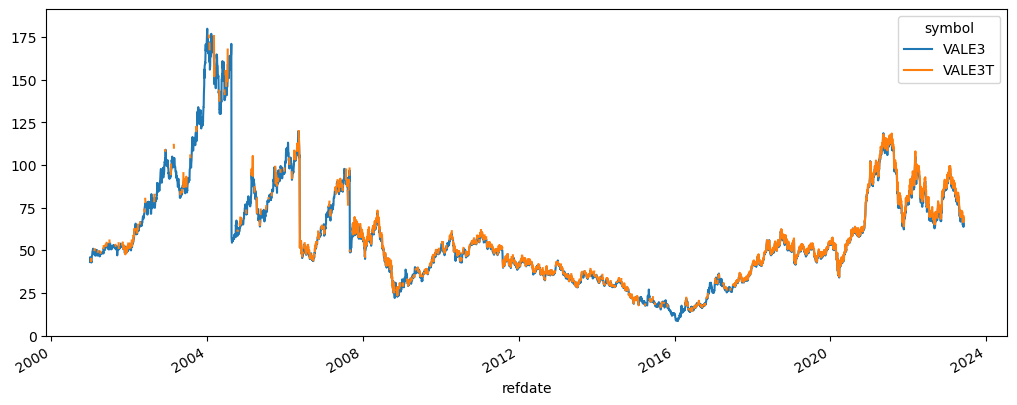

In [19]:
df.pivot(index="refdate", columns="symbol", values="close").plot()

In [20]:
df = con.sql("""
select *  from 'b3-cotahist'
where
    symbol = 'VALE3' and year(refdate) = 2005 order by refdate
""").to_df()
# df_wide = df.pivot(index="refdate", columns="symbol", values="close")
df

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,regtype,refdate,bdi_code,symbol,instrument_market,corporation_name,specification_code,days_to_settlement,trading_currency,open,...,trade_quantity,traded_contracts,volume,strike_price,strike_price_adjustment_indicator,maturity_date,allocation_lot_size,strike_price_in_points,isin,distribution_id
0,01,2005-01-03,2,VALE3,10,VALE R DOCE,ON N1,NaN,R$,76.50,...,314,255800,19397009.0,0.0,0,NaT,0.01,0.0,BRVALEACNOR0,165
1,01,2005-01-04,2,VALE3,10,VALE R DOCE,ON N1,NaN,R$,74.86,...,398,280400,20568416.0,0.0,0,NaT,0.01,0.0,BRVALEACNOR0,165
2,01,2005-01-05,2,VALE3,10,VALE R DOCE,ON N1,NaN,R$,72.05,...,410,433700,30984264.0,0.0,0,NaT,0.01,0.0,BRVALEACNOR0,165
3,01,2005-01-06,2,VALE3,10,VALE R DOCE,ON N1,NaN,R$,71.35,...,356,207100,14612634.0,0.0,0,NaT,0.01,0.0,BRVALEACNOR0,165
4,01,2005-01-07,2,VALE3,10,VALE R DOCE,ON N1,NaN,R$,71.87,...,443,328000,23891863.0,0.0,0,NaT,0.01,0.0,BRVALEACNOR0,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,01,2005-12-23,2,VALE3,10,VALE R DOCE,ON N1,NaN,R$,96.50,...,154,102500,9832608.0,0.0,0,NaT,0.01,0.0,BRVALEACNOR0,167
245,01,2005-12-26,2,VALE3,10,VALE R DOCE,ON N1,NaN,R$,95.60,...,76,69800,6617395.0,0.0,0,NaT,0.01,0.0,BRVALEACNOR0,167
246,01,2005-12-27,2,VALE3,10,VALE R DOCE,ON N1,NaN,R$,95.40,...,247,250600,23949617.0,0.0,0,NaT,0.01,0.0,BRVALEACNOR0,167
247,01,2005-12-28,2,VALE3,10,VALE R DOCE,ON N1,NaN,R$,94.55,...,360,251200,23992156.0,0.0,0,NaT,0.01,0.0,BRVALEACNOR0,167
